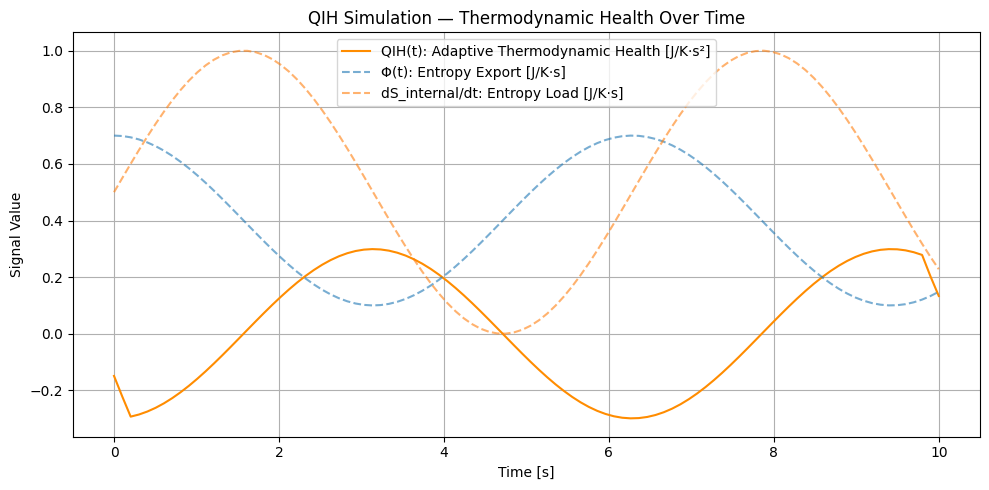

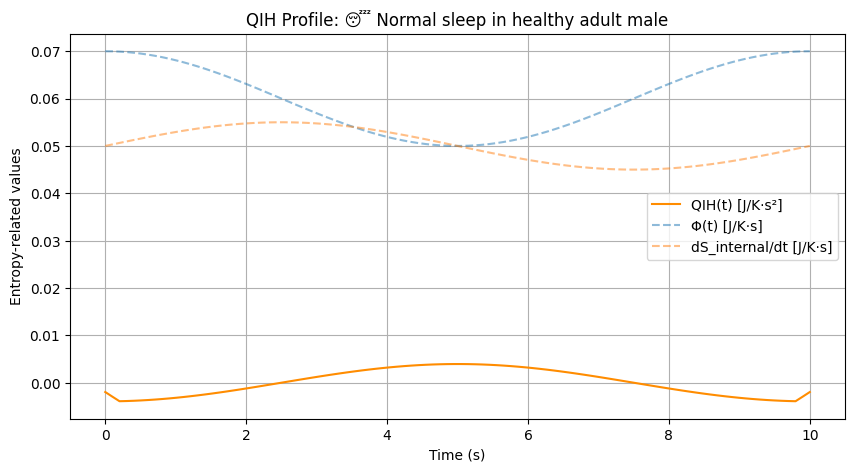

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


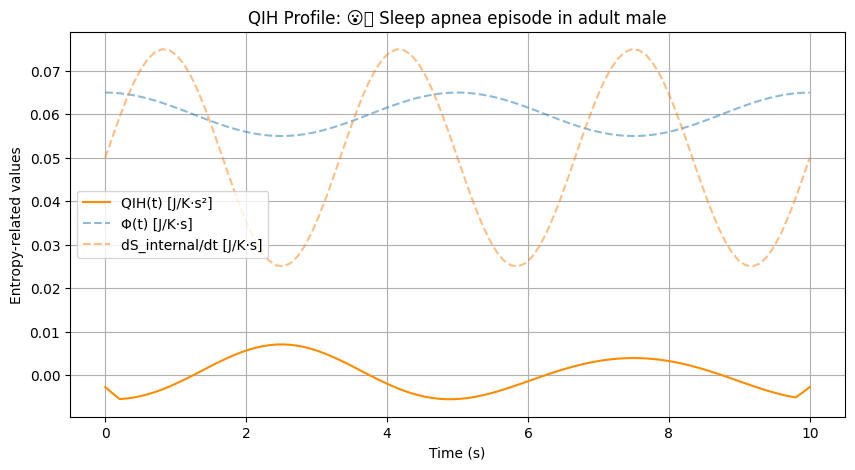

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


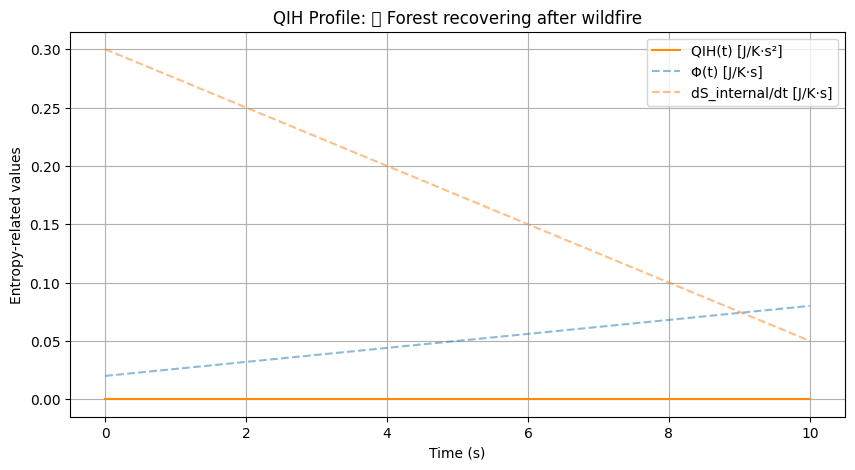

In [7]:
# QIH Simulator – Thermodynamic Health Signal
# -------------------------------------------
# This notebook simulates QIH (Quantified Inference of Health),
# defined as the second time derivative of entropy flux, modulated by boundary responsiveness.
#
# Units:
#   - Φ(t): entropy flux (Joules per Kelvin per second) [J/K·s]
#   - d²Φ/dt²: curvature of entropy export (Joules per Kelvin per second³) [J/K·s³]
#   - QIH(t): thermodynamic health signal [J/K·s²]

import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# System Definition
# ---------------------------

# Set simulation parameters
timesteps = 100                         # Number of points in the simulation
time = np.linspace(0, 10, timesteps)   # Time in seconds

# ---------------------------
# Example Assumptions:
# ---------------------------
# Let's model a human-like system recovering from acute stress.
# - Entropy generation inside the body gradually decreases (e.g. after a fight-or-flight response)
# - Entropy export (Φ) shows a regulated increase, then plateaus
# - Boundary integrity is stable (no major physiological breakdown)

# ENTROPY LOAD: internal disorder production [J/K·s]
# Approximated using a sinusoidal recovery curve scaled between 0.0 and 1.0 J/K·s
dS_internal_dt = 0.5 + 0.5 * np.sin(time)
# This simulates internal entropy peaking early, then dropping during recovery.

# ENTROPY FLUX Φ(t): export of entropy [J/K·s]
# Approximated as a damped oscillation to represent regulated metabolic or signalling response
phi = 0.4 + 0.3 * np.cos(time)
# Starts high, gently oscillates toward baseline export

# BOUNDARY RESPONSIVENESS B(t): [unitless]
# Reflects physiological integrity or network adaptability.
# For simplicity, we assume a constant healthy boundary (B = 1.0)
B = np.ones_like(time)

# ---------------------------
# QIH Calculation
# ---------------------------

# d²Φ/dt²: second derivative of entropy export [J/K·s³]
d2_phi_dt2 = np.gradient(np.gradient(phi, time), time)

# QIH(t) = B(t) × d²Φ(t)/dt² [J/K·s²]
QIH = B * d2_phi_dt2

# ---------------------------
# Plotting
# ---------------------------

plt.figure(figsize=(10, 5))
plt.plot(time, QIH, label='QIH(t): Adaptive Thermodynamic Health [J/K·s²]', color='darkorange')
plt.plot(time, phi, '--', label='Φ(t): Entropy Export [J/K·s]', alpha=0.6)
plt.plot(time, dS_internal_dt, '--', label='dS_internal/dt: Entropy Load [J/K·s]', alpha=0.6)

plt.title('QIH Simulation — Thermodynamic Health Over Time')
plt.xlabel('Time [s]')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔬 Try a Preset System Profile

import numpy as np
import matplotlib.pyplot as plt

def run_qih_simulation(profile="sleep_normal", duration=10, steps=100):
    time = np.linspace(0, duration, steps)

    if profile == "forest_fire":
        description = "🌲 Forest recovering after wildfire"
        dS_internal_dt = np.linspace(0.3, 0.05, steps)  # J/K·s, decreasing entropy generation
        phi = np.linspace(0.02, 0.08, steps)            # J/K·s, increasing entropy export
        B = np.linspace(0.2, 0.7, steps)                 # unitless, recovering boundary

    elif profile == "ai_overload":
        description = "🤖 AI agent under computational overload"
        dS_internal_dt = np.linspace(0.1, 0.3, steps)    # rising disorder (J/K·s)
        phi = np.linspace(0.1, 0.12, steps)              # limited entropy export (J/K·s)
        B = np.linspace(0.9, 0.4, steps)                 # degrading boundary integrity

    elif profile == "sleep_normal":
        description = "😴 Normal sleep in healthy adult male"
        dS_internal_dt = 0.05 + 0.005 * np.sin(2 * np.pi * time / duration)
        phi = 0.06 + 0.01 * np.cos(2 * np.pi * time / duration)
        B = np.ones_like(time)                           # stable boundary (B = 1)

    elif profile == "sleep_apnea":
        description = "😮‍💨 Sleep apnea episode in adult male"
        dS_internal_dt = 0.05 + 0.025 * np.sin(6 * np.pi * time / duration)  # disrupted internal entropy
        phi = 0.06 + 0.005 * np.cos(4 * np.pi * time / duration)            # blunted entropy export
        B = 0.7 + 0.2 * np.sin(2 * np.pi * time / duration)                 # unstable boundary

    else:
        raise ValueError("Unknown profile. Choose from: sleep_normal, sleep_apnea, forest_fire, ai_overload.")

    # Compute second derivative of phi
    d2phi_dt2 = np.gradient(np.gradient(phi, time), time)
    QIH = B * d2phi_dt2  # QIH units: J/K·s²

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(time, QIH, label='QIH(t) [J/K·s²]', color='darkorange')
    plt.plot(time, phi, '--', label='Φ(t) [J/K·s]', alpha=0.5)
    plt.plot(time, dS_internal_dt, '--', label='dS_internal/dt [J/K·s]', alpha=0.5)
    plt.title(f"QIH Profile: {description}")
    plt.xlabel("Time (s)")
    plt.ylabel("Entropy-related values")
    plt.legend()
    plt.grid(True)
    plt.show()

import ipywidgets as widgets
from IPython.display import display

# Dropdown for scenario selection
profile_selector = widgets.Dropdown(
    options=[
        ('😴 Normal Sleep', 'sleep_normal'),
        ('😮‍💨 Sleep Apnea', 'sleep_apnea'),
        ('🌲 Forest Fire Recovery', 'forest_fire'),
        ('🤖 AI Overload', 'ai_overload'),
    ],
    value='sleep_normal',
    description='Scenario:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

# Slider for time duration (in seconds)
duration_slider = widgets.FloatSlider(
    value=10.0,
    min=1.0,
    max=60.0,
    step=1.0,
    description='Duration (s):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

# Run button
run_button = widgets.Button(
    description="Run Simulation",
    button_style='success'
)

# Callback function
def on_run_clicked(b):
    run_qih_simulation(
        profile=profile_selector.value,
        duration=duration_slider.value,
        steps=100  # Fixed resolution for simplicity
    )

run_button.on_click(on_run_clicked)

# Display the interactive widgets
display(widgets.VBox([profile_selector, duration_slider, run_button]))

# ---------------------------
# Interpretation
# ---------------------------

# - QIH(t) captures the **curvature** of entropy export: how quickly the system ramps up or down.
# - A positive QIH means entropy export is accelerating — the system is adapting actively.
# - A negative QIH may reflect down-regulation, return to baseline, or system stagnation.
# - The boundary factor B(t) can be modulated to reflect stress, collapse, or recovery failure.